<a href="https://colab.research.google.com/github/karnagetm/Text-Mining-Project/blob/main/Karan_patel_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prior study (Codes in Week 5 folder）**:

Please use this page as companion to understand the newsgroup data set.
[Data Set](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

You will also need to be familiar with some text processing commands：

[Tf-idf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

[countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

# **Steps outline**
1. Download your data set by inputting your student number.
2. Process your text data, extract features, convert them into vectors
3. Modeling, train models on the data set (select model, tune different parameters)
4. Process your text data, extract features, convert them into vectors
5. Analysis and discussions

# Step 1: Load Dataset


Prior study (Codes in Week 5 folder）:

Please use this page as companion to understand  [**Newsgroup data set**](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

**This is how to identify which data set to use (Please copy  the following information in report front   page).**

In [3]:
index=input('type your student number?')

type your student number?30021323


In [4]:
x=divmod(int(index),4)
yourdata1=x[1]
y=divmod(int(index),3)
yourdata2=y[1]

print('This is your data set index ----> (', x[1], y[1], ')' )

This is your data set index ----> ( 3 2 )


In [5]:
data1= twenty_train.target_names[x[1]]
data2= twenty_train.target_names[y[1]]
categories1=[data1,data2]
print(categories1)

['soc.religion.christian', 'sci.med']


**Your front page data information Ends here**

# Step 2 Process your text data, extract features

# 2.1 An example of preprocessing

**An example is provided.**

Please pay attention  comment #replace ..., which means you need to change example text to your data set.
Use google search for usages of  "nltk tokenizer ”, "nltk stemmer", "nltk pos tag" to help your report writing.

In [ ]:
# write your own NLP precessing examples with  preprocessing techniques.


dataset=twenty_train.data[2]
dataset=twenty_train.data[3]
print(dataset)
# please   replace 1 in bracket to other data sample and explore the code

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


From: s0612596@let.rug.nl (M.M. Zwart)
Subject: catholic church poland
Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL
Lines: 10

Hello,

I'm writing a paper on the role of the catholic church in Poland after 1989. 
Can anyone tell me more about this, or fill me in on recent books/articles(
in english, german or french). Most important for me is the role of the 
church concerning the abortion-law, religious education at schools,
birth-control and the relation church-state(government). Thanx,

                                                 Masja,
"M.M.Zwart"<s0612596@let.rug.nl>



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# tokenize: search: nltk tokenize
example = "This is an example sentence."

from nltk.tokenize import word_tokenize
example_tokenize =word_tokenize(dataset)
#example_tokenize= word_tokenize(dataset) # replace example in bracket to dataset.
print("-------------------------tokenize:")
print(example_tokenize)

-------------------------tokenize:
['From', ':', 's0612596', '@', 'let.rug.nl', '(', 'M.M', '.', 'Zwart', ')', 'Subject', ':', 'catholic', 'church', 'poland', 'Organization', ':', 'Faculteit', 'der', 'Letteren', ',', 'Rijksuniversiteit', 'Groningen', ',', 'NL', 'Lines', ':', '10', 'Hello', ',', 'I', "'m", 'writing', 'a', 'paper', 'on', 'the', 'role', 'of', 'the', 'catholic', 'church', 'in', 'Poland', 'after', '1989', '.', 'Can', 'anyone', 'tell', 'me', 'more', 'about', 'this', ',', 'or', 'fill', 'me', 'in', 'on', 'recent', 'books/articles', '(', 'in', 'english', ',', 'german', 'or', 'french', ')', '.', 'Most', 'important', 'for', 'me', 'is', 'the', 'role', 'of', 'the', 'church', 'concerning', 'the', 'abortion-law', ',', 'religious', 'education', 'at', 'schools', ',', 'birth-control', 'and', 'the', 'relation', 'church-state', '(', 'government', ')', '.', 'Thanx', ',', 'Masja', ',', "''", 'M.M.Zwart', "''", '<', 's0612596', '@', 'let.rug.nl', '>']


In [ ]:
# stemmer: search: nltk stemmer
stemmer = nltk.stem.PorterStemmer()
example_stem = stemmer.stem(example)  # replace .....
print("-------------------------stem:")
print(example_stem)

-------------------------stem:
this is an example sentence.


In [ ]:
# pos_taging: search: nltk pos tagging example
example_posTag=nltk.pos_tag(example_tokenize)
print("-------------------------pos_taging:")
print(example_posTag)

-------------------------pos_taging:
[('From', 'IN'), (':', ':'), ('s0612596', 'NN'), ('@', 'NN'), ('let.rug.nl', 'NN'), ('(', '('), ('M.M', 'NNP'), ('.', '.'), ('Zwart', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('catholic', 'JJ'), ('church', 'NN'), ('poland', 'NN'), ('Organization', 'NNP'), (':', ':'), ('Faculteit', 'NNP'), ('der', 'NN'), ('Letteren', 'NNP'), (',', ','), ('Rijksuniversiteit', 'NNP'), ('Groningen', 'NNP'), (',', ','), ('NL', 'NNP'), ('Lines', 'NNPS'), (':', ':'), ('10', 'CD'), ('Hello', 'NNP'), (',', ','), ('I', 'PRP'), ("'m", 'VBP'), ('writing', 'VBG'), ('a', 'DT'), ('paper', 'NN'), ('on', 'IN'), ('the', 'DT'), ('role', 'NN'), ('of', 'IN'), ('the', 'DT'), ('catholic', 'JJ'), ('church', 'NN'), ('in', 'IN'), ('Poland', 'NNP'), ('after', 'IN'), ('1989', 'CD'), ('.', '.'), ('Can', 'MD'), ('anyone', 'NN'), ('tell', 'VB'), ('me', 'PRP'), ('more', 'JJR'), ('about', 'IN'), ('this', 'DT'), (',', ','), ('or', 'CC'), ('fill', 'VB'), ('me', 'PRP'), ('in', 'IN'), ('on', 

In [ ]:
 # consituency parsing, chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(example_posTag)
print(result)

(S
  From/IN
  :/:
  (NP s0612596/NN)
  (NP @/NN)
  (NP let.rug.nl/NN)
  (/(
  M.M/NNP
  ./.
  Zwart/NNP
  )/)
  (NP Subject/NN)
  :/:
  (NP catholic/JJ church/NN)
  (NP poland/NN)
  Organization/NNP
  :/:
  Faculteit/NNP
  (NP der/NN)
  Letteren/NNP
  ,/,
  Rijksuniversiteit/NNP
  Groningen/NNP
  ,/,
  NL/NNP
  Lines/NNPS
  :/:
  10/CD
  Hello/NNP
  ,/,
  I/PRP
  'm/VBP
  writing/VBG
  (NP a/DT paper/NN)
  on/IN
  (NP the/DT role/NN)
  of/IN
  (NP the/DT catholic/JJ church/NN)
  in/IN
  Poland/NNP
  after/IN
  1989/CD
  ./.
  Can/MD
  (NP anyone/NN)
  tell/VB
  me/PRP
  more/JJR
  about/IN
  this/DT
  ,/,
  or/CC
  fill/VB
  me/PRP
  in/IN
  on/IN
  recent/JJ
  books/articles/NNS
  (/(
  in/IN
  (NP english/NN)
  ,/,
  german/JJ
  or/CC
  french/JJ
  )/)
  ./.
  Most/RBS
  important/JJ
  for/IN
  me/PRP
  is/VBZ
  (NP the/DT role/NN)
  of/IN
  (NP the/DT church/NN)
  concerning/VBG
  (NP the/DT abortion-law/NN)
  ,/,
  (NP religious/JJ education/NN)
  at/IN
  schools/NNS
  ,/,
  (NP b

#2.2 NLP Preprocesssing

**Some preprocessing are provided for convenience. Please include why NLP preprocessing is in your report. Explain what techniques have been experimented in your report.**

In [6]:
import nltk
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word

def stemWord(word):
    stem = stemmer.stem(word)
    if stem is not None:
        return stem
    else:
        return word

def processText(text,lemma=False, gram=1, rmStop=True): # default remove stop words
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE) #delete URL, #hashtag# , and @xxx
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
      i = i.lower()
      if i.isalpha() and (i not in stoplist or i in whitelist):  #i not in ['.',',',';']  and (...)
        if lemma: i = lemmaWord(i)
        new_tokens.append(i)
    del tokens
    # tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stoplist or i.lower() in whitelist) and i.isalpha()]
    if gram<=1:
        return new_tokens
    else:
        return [' '.join(ngram) for ngram in nltk.ngrams(new_tokens, gram)] # altered for N-grams
        #return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
def getTags(text):
  token = word_tokenize(text)
  token = [l.lower() for l in token]
  train_tags = nltk.pos_tag(token)
  return [i[1] for i in train_tags]


In [8]:
from sklearn.datasets import fetch_20newsgroups

# Select the categories you want to load
categories = ['soc.religion.christian', 'sci.med']

# Fetch the training data for these categories
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Here, twenty_train.data is your actual dataset, a list of text documents
dataset = twenty_train.data  # This is a list of strings

# Now you can process the first document as an example
print(processText(dataset[3]))
print(processText(dataset[2]))

['carter', 'page', 'subject', 'accepting', 'jeesus', 'heart', 'organization', 'university', 'pennsylvania', 'lines', 'article', 'eric', 'molas', 'writes', 'firstly', 'atheist', 'atheist', 'drivel', 'deleted', 'untitled', 'seed', 'miraculous', 'thing', 'sit', 'shelf', 'forever', 'knows', 'stuck', 'ground', 'makes', 'clever', 'draws', 'nutrients', 'soil', 'roots', 'gathers', 'force', 'sun', 'puts', 'forth', 'whole', 'lot', 'blossoms', 'fruit', 'recedes', 'done', 'programmed', 'seed', 'know', 'put', 'sun', 'sky', 'put', 'food', 'dirt', 'roots', 'told', 'bees', 'come', 'makes', 'water', 'fall', 'refresh', 'make', 'everything', 'pure', 'perhaps', 'product', 'love', 'perhaps', 'happened', 'chance', 'yeah', 'sure', 'hart', 'cartoonist', 'carter', 'page', 'happiness', 'crown', 'chiefest', 'part', 'wisdom', 'carpenter', 'apprentice', 'hold', 'god', 'awe', 'law', 'seeing', 'stricken', 'heart', 'pride', 'brought', 'learn', 'old', 'sophocles']
['marida', 'ignacio', 'subject', 'every', 'lent', 'suf

In [9]:
processed_text_bigrams = processText(dataset[3], lemma=False, gram=2, rmStop=True)  # for the third document
processed_text_bigrams = processText(dataset[2], lemma=False, gram=2, rmStop=True)  # for the second document
#process the third and second documents,individually and obtain bigrams from each doc



# The above assumes that your processText function is designed to work with CountVectorizer
# and returns a list of tokens.



In [10]:
processed_texts = [processText(text) for text in dataset]
#allows the code below to work


In [11]:
tagged_texts = [getTags(' '.join(text)) for text in processed_texts]

# Process the first document and get its POS tags
processed_text = processText(dataset[3])
processed_text = processText(dataset[2])
tagged_text = getTags(' '.join(processed_text))
print(tagged_text)



['NN', 'NN', 'JJ', 'DT', 'NN', 'NNS', 'VBP', 'PRP', 'NN', 'NNS', 'NN', 'VBN', 'CD', 'CD', 'NNS', 'VBD', 'NN', 'JJ', 'NN', 'VBD', 'JJ', 'FW', 'NN', 'JJ', 'JJ', 'NN', 'NN', 'NN', 'VBD', 'NN', 'VBN', 'NN', 'PRP', 'VBZ', 'DT', 'NN', 'NN', 'VBZ', 'JJ', 'VBN', 'NN', 'JJ', 'NNS', 'VBP', 'JJ', 'NNS', 'VBP', 'JJ', 'NN', 'NN', 'JJ', 'NN', 'VBN', 'NNS', 'VBP', 'PRP', 'JJ', 'JJ', 'NN', 'NNS', 'VBP', 'JJ', 'NN', 'NN', 'FW', 'VBG', 'NN', 'NNS', 'NNS', 'VBD', 'JJ', 'NN', 'VBD', 'NN', 'VBD', 'RB', 'NN', 'NN', 'NNS', 'NNS', 'NNS', 'VBP', 'JJ', 'NNS', 'JJ', 'NN', 'NN', 'VBD', 'IN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'JJ', 'VBG', 'PRP', 'VBP', 'JJ', 'JJ', 'JJ', 'VBG', 'VBG', 'JJ', 'VBN', 'NN', 'RB', 'VBG', 'JJ', 'JJ', 'VBG', 'JJ', 'JJ', 'VBP', 'JJ', 'JJ', 'NN', 'JJ', 'VBN', 'NN', 'IN', 'JJ', 'JJ', 'NN', 'VBP', 'JJ', 'CD', 'JJ', 'NN', 'VBD', 'CD', 'NNS', 'VBZ', 'NNS', 'NNS', 'VBD', 'JJ', 'NN', 'VBG', 'VBG', 'NNS', 'JJ', 'VBG', 'JJ', 'NN', 'NN', 'NN', 'NNS', 'NN', 'MD', 'VB', 'JJS', 'RB', 'RB', 'JJ', 'NN'

# Step 3: Build a Pipeline

**Modify the block code below to your choice of classifier [link text](https://www.nltk.org/book/ch06.html)

In [12]:
print(categories1)


['soc.religion.christian', 'sci.med']


Without modification, the code will output all four classes.


I included some commented codes in places where you may use to change to two class data sets   from your student number, and use logistic model.
Your data sets can be obtained as twenty_train1, twenty_test1. All  data set names can be adjusted to get it right.

In [13]:
twenty_train1 = fetch_20newsgroups(subset='train',  categories=categories1, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test',  categories=categories1, shuffle=True, random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Level: lexicon, model: tf-idf
text_clf = Pipeline([
    # add your code about text processing
    ('vect', CountVectorizer(analyzer=processText)),
    ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example
    #('clf', SGDClassifier())
     ('clf', LogisticRegression())

])

In [15]:
# To train the model
text_clf.fit(twenty_train1.data, twenty_train1.target)


Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function processText at 0x7fa0b9370670>)),
                ('tfidf', TfidfTransformer()), ('clf', LogisticRegression())])

# Step 4: Make Prediction

In [16]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
predicted = text_clf.predict(twenty_test1.data)

# To make prediction with dev/test set
#predicted = text_clf.predict(twenty_test1.data)

# Step 5: Evaluation

**You need to modify the code so only two classes from your student number are output as matrix.**

In [17]:
# To evaluate your prediction on dev set
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted))

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(twenty_test.target, predicted))

# Print the precision, recall, and F1 score for each category
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

#  weighted average of these metrics
print("Weighted Precision:", metrics.precision_score(twenty_test.target, predicted, average='weighted'))
print("Weighted Recall:", metrics.recall_score(twenty_test.target, predicted, average='weighted'))
print("Weighted F1 Score:", metrics.f1_score(twenty_test.target, predicted, average='weighted'))

print(metrics.classification_report(twenty_test1.target, predicted, target_names=twenty_test1.target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(twenty_test1.target, predicted),
             columns=twenty_test1.target_names,index=twenty_test1.target_names)

Accuracy: 0.9697732997481109
Accuracy: 0.9697732997481109
                        precision    recall  f1-score   support

               sci.med       0.96      0.98      0.97       396
soc.religion.christian       0.98      0.96      0.97       398

              accuracy                           0.97       794
             macro avg       0.97      0.97      0.97       794
          weighted avg       0.97      0.97      0.97       794

Weighted Precision: 0.9698817701448037
Weighted Recall: 0.9697732997481109
Weighted F1 Score: 0.9697721490219187
                        precision    recall  f1-score   support

               sci.med       0.96      0.98      0.97       396
soc.religion.christian       0.98      0.96      0.97       398

              accuracy                           0.97       794
             macro avg       0.97      0.97      0.97       794
          weighted avg       0.97      0.97      0.97       794



,sci.med,soc.religion.christian
sci.med,387,9
soc.religion.christian,15,383


# Step 6: Error Analysis and Discussion
write down your own obseration about the predictions. Consider both confusion matrix and selected examples. Which classes are predicted correctly or incorrecly, possible explaination, possible solutions

Exmaple: 1) Lab Practical, which feature is helpful for female name classification. https://www.nltk.org/book/ch06.html
2) research paper: https://github.com/yoonkim/CNN_sentence


In [18]:
print(len(twenty_test.data))
print(len(twenty_test.target))
predicted = text_clf.predict(twenty_test.data)
print(len(predicted))

df_pred = pd.DataFrame({'news': twenty_test.data, 'predicted': predicted, 'true': twenty_test.target})
df_pred['correct'] = df_pred['predicted'] == df_pred['true']
incorrect_predictions = df_pred[df_pred['correct'] == False]

#df_pred = pd.DataFrame({'news':twenty_test.data,'prediction':predicted, 'true':twenty_test.target})
#df_pred[df_pred['true'] != df_pred['prediction']]

794
794
794


In [19]:
#evaluate the predictions
#creating confusion matrix anc calculating other evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming 'twenty_test.target' are the true labels and 'predicted' are the labels predicted by your model
cm = confusion_matrix(twenty_test.target, predicted)
cr = classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names)
accuracy = accuracy_score(twenty_test.target, predicted)

# Print out the metrics
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[387   9]
 [ 15 383]]

Classification Report:
                         precision    recall  f1-score   support

               sci.med       0.96      0.98      0.97       396
soc.religion.christian       0.98      0.96      0.97       398

              accuracy                           0.97       794
             macro avg       0.97      0.97      0.97       794
          weighted avg       0.97      0.97      0.97       794


Accuracy: 0.9697732997481109


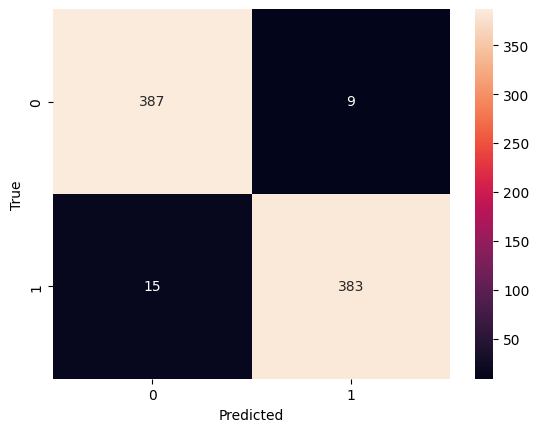

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted' contains your model predictions and 'twenty_test.target' are the true labels
cm = confusion_matrix(twenty_test.target, predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
import numpy as np

# Assume `twenty_test.target` are the true labels and `predicted` are your model's predictions
false_positives = np.where((predicted == 1) & (twenty_test.target == 0))[0]
false_negatives = np.where((predicted == 0) & (twenty_test.target == 1))[0]

#FALSE POSITIVE
print("Example of a false positive (Predicted as 1 but actual is 0):")
print(twenty_test.data[false_positives[0]])

Example of a false positive (Predicted as 1 but actual is 0):
From: menon@boulder.Colorado.EDU (Ravi or Deantha Menon)
Subject: Re: Need info on Circumcision, medical cons and pros
Nntp-Posting-Host: beagle.colorado.edu
Organization: University of Colorado, Boulder
Lines: 29

texx@ossi.com ("Texx") writes:

>Scene: Navy boot camp

>DI:		"Son, you smel awful! Dont you ever clean that thing?"
>Recruit:	"No Sir !"
>DI:		"Why the hell NOT!"
>Recruit:	"Your not sposed to touch down there?"
>DI:		"Why ?"
>Recruit:	"Cause thats the eye of god down there, an' your not s'posed to touch it..."

>This did not happen 40 years ago, it happened 2 years ago.

>I think Americans are QUITE hung up about sex and the involved plumbing!

Cute anecdote, but hardly indicative of the population.  From the responses
I've received to that post (all from men, by the way) I get the impression
that unless a person is willing to drop down and masturbate whenever the
need or desire strikes, then that person is very

In [25]:
#FALSE NEGETIVE
print("Example of a false negative (Predicted as 0 but actual is 1):")
print(twenty_test.data[false_negatives[0]])


Example of a false negative (Predicted as 0 but actual is 1):
From: idqm400@indyvax.iupui.edu
Subject: Knights of Columbus
Lines: 9


	The initiations ceremony for Knights ous is almost
as secretive as that for the Mafia.

What are the phases of initation and why the secretiveness?


Dale   idqm400@indyvax.iupui.edu
                                                                



In [26]:
# Display examples of CORRECT predictions
correct_indices = [i for i, (true, pred) in enumerate(zip(twenty_test.target, predicted)) if true == pred]
incorrect_indices = [i for i, (true, pred) in enumerate(zip(twenty_test.target, predicted)) if true != pred]

print("Correctly predicted examples:")
for i in correct_indices[:5]:  # Display first 5 correct predictions
    print(f"News: {twenty_test.data[i]}")
    print(f"Predicted: {twenty_test.target_names[predicted[i]]}, Actual: {twenty_test.target_names[twenty_test.target[i]]}\n")

Correctly predicted examples:
News: From: sun075!Gerry.Palo@uunet.uu.net (Gerry Palo)
Subject: Re: Portland earthquake
Lines: 68

Austin C Archer (archau@saturn.wwc.edu) wrote:
>
>I am interested in views about the non-event of May 3. Seriously, how can a 
>Christian discriminate between "messages from God" which are to be taken 
>seriously, and those which are spurious?  Is there a useful heuristic which 
>would help us avoid embracing messages which, by their non-fulfillment are 
>proven to be false, thus causing the name of Christ to be placed in 
>disrepute? Is this a problem at all?

It is possible that the individual saw a true prophetic vision, but that he
interpreted the scale of time and space according to his material con-
sciousness, translating the supersensible perceptions of a plane above
that of time and space into an immediate worldly context -- and getting it
wrong.  Not that he did it rationally, but rather that unconsciously the
perceptions became clothed in material

In [27]:
#Incorrect Predicted Example

print("Incorrectly predicted examples:")
for i in incorrect_indices[:5]:  # Display first 5 incorrect predictions
    print(f"News: {twenty_test.data[i]}")
    print(f"Predicted: {twenty_test.target_names[predicted[i]]}, Actual: {twenty_test.target_names[twenty_test.target[i]]}\n")

Incorrectly predicted examples:
News: From: idqm400@indyvax.iupui.edu
Subject: Knights of Columbus
Lines: 9


	The initiations ceremony for Knights ous is almost
as secretive as that for the Mafia.

What are the phases of initation and why the secretiveness?


Dale   idqm400@indyvax.iupui.edu
                                                                

Predicted: sci.med, Actual: soc.religion.christian

News: From: dt4%cs@hub.ucsb.edu (David E. Goggin)
Subject: Dreams and out of body incidents
Lines: 38

hey folks,

I'm fairly new to these groups, tho' some have heard from me before.

I'd like to get your comments on a question that has been on my mind a
lot:  What morals/ethics apply to dreams and out-of-body incidents?
In normal dreams, you can't control anything, so obviously
you aren't morally responsible for your actions.  But if you can contrive
to control the action in dreams or do an OOBE, it seems like a morality applies.

Now, there seem to be 3 alternatives:

1) Dreams 

#References:  

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://www.nltk.org/book/ch06.html

search: Other online resources:

https://towardsdatascience.com/setting-up-text-preprocessing-pipeline-using-scikit-learn-and-spacy-e09b9b76758f

sentiment analysis scikit learn

scikit learn or nltk + NLP techniques

python + NLP techniques

scikit learn logistic regression


